In [12]:
import math
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [13]:
def load_system_matrix(filename):
    data = scipy.io.loadmat(filename)
    K = data['K'][0]
    # format for data[0][pixel index][0]
    return K
def load_sensordata(filename):
    data = scipy.io.loadmat(filename)
    sensor_data_noisy = data['sensor_data_noisy']
    p_recorded = data['p_recorded']
    medium = data['medium']
    sensor = data['sensor']
    sensor_data = data['sensor_data']
    return sensor_data_noisy, p_recorded, medium, sensor, sensor_data

system_matrix = load_system_matrix('system_matrix.mat')
sensor_data_noisy, p_recorded, medium, sensor, sensor_data = load_sensordata('sensor_data_noisy')


The mode shapes in a rectangular domain with lengths \(L_x\) and \(L_y\) are given by:
$$
\[
\phi_{n,m}(x, y) = \sqrt{\frac{4}{L_x L_y}} \sin\left(\frac{n \pi x}{L_x}\right) \sin\left(\frac{m \pi y}{L_y}\right)
\]
$$

In [14]:
# process K for TwIST algorithm
# Process system_matrix for TwIST algorithm, ensuring rows are processed correctly
def process_K(system_matrix):
    system_matrix = np.array(system_matrix)
    two_d_array = np.empty((0, system_matrix[0].shape[1]))
    
    for row in system_matrix:
        two_d_array = np.vstack([two_d_array, row[0]])
    
    return two_d_array


system_matrix = process_K(system_matrix)


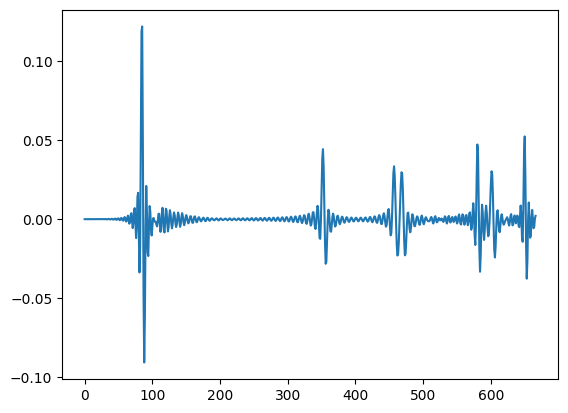

In [15]:
plt.plot(system_matrix[100]) # sensor data from the pixel index 11

In [16]:
def process_sensor_data(signal_matrix_decon):
    signal_matrix_decon = np.array(signal_matrix_decon)
    twoD_array = np.empty((0, signal_matrix_decon.shape[1]))
    for i in signal_matrix_decon:
        two_d_array = np.vstack([twoD_array, i])
    return signal_matrix_decon

sensor_data_noisy = process_sensor_data(sensor_data_noisy)
sensor_data_noisy = np.reshape(sensor_data_noisy, (sensor_data_noisy.shape[1], 1))
sensor_data = process_sensor_data(sensor_data)
sensor_data = np.reshape(sensor_data, (sensor_data.shape[1], 1))
p_recorded = process_sensor_data(p_recorded)

In [17]:
p_recorded = np.array(p_recorded)
p_recorded.shape

(667, 1)

In [18]:
sensor_data_noisy.shape

(667, 1)

In [19]:
system_matrix.shape

(768, 667)

In [20]:
import importlib.util
import os, sys

# Define the path to the TwIST.py file

sys.path.append('gitclone/Image-Restoration-Algorithm-TwIST')


from TwIST import TwIST, TwIST2, clean_out_TwIST

In [21]:
bool_create_test_variable = False
if bool_create_test_variable == True:
    A = np.array([[0.5, 0.2, 0.1, 0.0, 0.1, 0.2, 0.1, 0.3, 0.2, 0.1],
                [0.1, 0.7, 0.2, 0.1, 0.2, 0.1, 0.2, 0.1, 0.1, 0.3],
                [0.3, 0.2, 0.8, 0.2, 0.1, 0.3, 0.2, 0.2, 0.3, 0.2],
                [0.2, 0.1, 0.3, 0.7, 0.3, 0.2, 0.1, 0.1, 0.3, 0.1],
                [0.1, 0.2, 0.1, 0.3, 0.7, 0.2, 0.3, 0.1, 0.2, 0.3],
                [0.2, 0.1, 0.3, 0.2, 0.1, 0.8, 0.2, 0.3, 0.1, 0.2],
                [0.3, 0.1, 0.2, 0.1, 0.2, 0.2, 0.7, 0.1, 0.3, 0.2],
                [0.2, 0.3, 0.2, 0.1, 0.1, 0.1, 0.1, 0.8, 0.2, 0.3],
                [0.1, 0.1, 0.3, 0.2, 0.2, 0.3, 0.1, 0.2, 0.7, 0.2],
                [0.2, 0.3, 0.1, 0.3, 0.2, 0.1, 0.2, 0.3, 0.2, 0.8]])

    # # Define desampleConvolvedNoise (10x1)
    desampleConvolvedNoise = np.array([[0.6],
                                    [0.9],
                                    [1.2],
                                    [0.8],
                                    [0.5],
                                    [1.1],
                                    [0.7],
                                    [1.3],
                                    [0.6],
                                    [1.0]])

    # # Define realSignal (10x1)
    realSignal = np.array([[1.0],
                        [1.5],
                        [2.0],
                        [1.2],
                        [0.8],
                        [1.6],
                        [1.1],
                        [2.2],
                        [1.0],
                        [1.8]])

    tau = 0.1
    alpha = 1.0
    beta = 0.5
    # x = TwIST(desampleConvolvedNoise, A, tau, realSignal, alpha, beta)
    # x2 = TwIST2(desampleConvolvedNoise, A, tau, alpha, beta)
    clean_out_x = clean_out_TwIST(desampleConvolvedNoise,  A, tau, realSignal, alpha, beta)
    print(f'Reconstructed signal: {clean_out_x}')
    # print("Reconstructed signal:", x)
    # print("Reconstructed signla X2:", x2)

    plt.plot(clean_out_x)

In [22]:
# sensor_data.shape
sensor_data_noisy.shape

(667, 1)

In [23]:
# Step 1: Rotate the matrix 180 degrees
rotated_matrix = np.rot90(system_matrix, 2)

# Step 2: Transpose the rotated matrix to change its shape to (600, 192)
system_matrix = rotated_matrix.T

print(system_matrix.shape, system_matrix.shape)

(667, 768) (667, 768)


In [24]:
print(sensor_data.shape, sensor_data_noisy.shape)

(667, 1) (667, 1)


### Parameter \(\alpha\) (Step Size)
- **Purpose:** The step size \(\alpha\) controls the magnitude of the gradient update during each iteration.
- **Role:** It determines how far the algorithm moves in the direction of the gradient. If \(\alpha\) is too large, the algorithm may overshoot and fail to converge. If \(\alpha\) is too small, the algorithm may converge very slowly.
- **Typical Value:** \(\alpha\) is usually chosen through experimentation and can be influenced by the scaling of the problem. It can be set to a fixed value or adapted dynamically during the iterations.

### Parameter \(\beta\) (TwIST Mixing Parameter)
- **Purpose:** The parameter \(\beta\) controls the mixing between the current and previous iterations in the TwIST update rule.
- **Role:** It determines how much influence the previous iteration has on the current update. This can help in accelerating convergence by incorporating momentum into the iterative process.
- **Typical Value:** \(\beta\) is generally set between 0 and 1. A common choice is \(\beta = 0.5\), but this can vary depending on the specific problem and the desired convergence behavior.

### Parameter \(\tau\) (Regularization Parameter)
- **Purpose:** The regularization parameter \(\tau\) controls the trade-off between the fidelity term and the regularization term in the objective function.
- **Role:** It determines the weight given to the regularization term (e.g., total variation) relative to the data fidelity term. A higher \(\tau\) places more emphasis on the regularization, promoting sparsity or smoothness in the solution.
- **Typical Value:** The value of \(\tau\) depends on the level of noise in the data and the desired properties of the reconstructed signal. It is usually determined through cross-validation or other model selection techniques.

### Equations Recap with Parameters

1. **Gradient Calculation:**
   \[
   \mathbf{g} = \mathbf{K}^T (\mathbf{y} - \mathbf{K} \mathbf{x})
   \]

2. **IST Step (Iterative Shrinkage/Thresholding):**
   \[
   \mathbf{x}_{\text{IST}}^{(k+1)} = \mathbf{D}(\mathbf{x}^{(k)} + \alpha \mathbf{g})
   \]
   where \(\mathbf{D}\) is the denoising/shrinkage operator, and \(\alpha\) is the step size.

3. **TwIST Step:**
   For \( k > 1 \):
   \[
   \mathbf{x}^{(k+1)} = (1 - \beta) \mathbf{x}_{\text{IST}}^{(k+1)} + \beta (\mathbf{x}^{(k)} - \mathbf{x}^{(k-1)})
   \]
   where \(\beta\) is the mixing parameter.

4. **Combining Steps:**
   The final update rule combines both steps:
   \[
   \mathbf{x}^{(k+1)} = (1 - \beta) \mathbf{D}(\mathbf{x}^{(k)} + \alpha \mathbf{g}) + \beta (\mathbf{x}^{(k)} - \mathbf{x}^{(k-1)})
   \]

5. **Convergence Criterion:**
   \[
   \frac{\|\mathbf{x}^{(k+1)} - \mathbf{x}^{(k)}\|_2}{\|\mathbf{x}^{(k)}\|_2} < \text{tol}
   \]

### Practical Tips

- **Choosing \(\alpha\):** Start with a small value (e.g., 0.1) and increase it if the algorithm converges too slowly. If the algorithm diverges, reduce \(\alpha\).
- **Choosing \(\beta\):** \(\beta\) typically ranges between 0.5 and 0.9. A common starting point is 0.5, and adjustments can be made based on convergence behavior.
- **Choosing \(\tau\):** \(\tau\) depends on the noise level and the desired smoothness/sparsity of the solution. It often requires tuning through cross-validation or heuristic methods.


In [29]:
tau = 0.1 # regulariztion parameter controls the trade-off between the fidelit term and the regularization term in the objective funciton 
            #  weight on the regularization term (e.g. Total Variation)
alpha = 1.0 # Step size controls the magnitude of the gradient updae during each iteration
beta = 0.5 # Influence from the previous iteration

desampleConvolvedNoise = sensor_data_noisy
A = system_matrix
# realSignal = sensor_data
realSignal = np.ones((768, 1))

#  test matrixes
x = clean_out_TwIST(desampleConvolvedNoise, A, tau, realSignal, alpha, beta)
# x = TwIST2(desampleConvolvedNoise, A, tau, alpha, beta)
print("Reconstructed signal:", x)

Iteration 10: MSE = 1.1739142611867825, SNR = 0.06337110863840839, SAD = 757.7723671888647
Iteration 20: MSE = 1.3116810819596028, SNR = 0.06790707948534824, SAD = 780.6507379077037
Iteration 30: MSE = 1.3982953942157277, SNR = 0.06994321707908784, SAD = 799.9134686486199
Iteration 40: MSE = 1.4599848122962484, SNR = 0.06913988495294227, SAD = 814.9879783066414
Iteration 50: MSE = 1.5048841473713235, SNR = 0.06893224467892338, SAD = 825.6889911870679
Iteration 60: MSE = 1.5395255381658384, SNR = 0.06898039369655991, SAD = 833.6638183832576
Iteration 70: MSE = 1.5673274682169864, SNR = 0.06938197734018955, SAD = 839.625014222293
Iteration 80: MSE = 1.5897560495104415, SNR = 0.07009180431085268, SAD = 844.1301560484624
Iteration 90: MSE = 1.6087052337014944, SNR = 0.07053135169578141, SAD = 847.8625216359951
Iteration 100: MSE = 1.6248348554902687, SNR = 0.07073141842746494, SAD = 851.1011855173402
Iteration 110: MSE = 1.6384208767348338, SNR = 0.07101091046195852, SAD = 853.798919241940

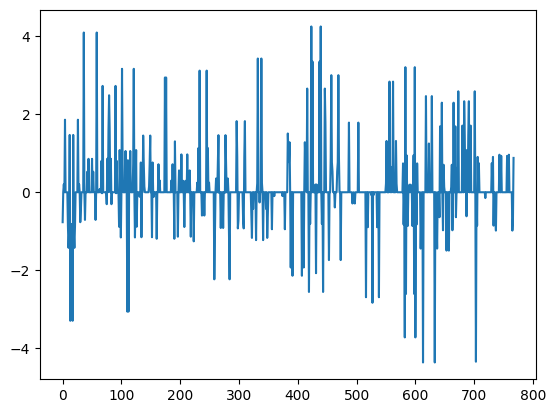

In [26]:
x.shape
plt.plot(x)

In [27]:
x = TwIST2(desampleConvolvedNoise=p_recorded, A=system_matrix, realSignal=p_recorded , tau=0.1, alpha=1, beta=1)

ValueError: Incompatible shapes: A has 768 columns but realSignal has 667 rows